# Proyek Analisis Data: Nama dataset
- Nama: Dicky Maulana Rozi
- Email: dickymaulanarozi@gmail.com
- Id Dicoding: dickymrz

## Menentukan Pertanyaan Bisnis

- **Kota** apa saja yang paling sering melakukan **pemesanan** produk?

- Berapa presentase **produk** yang menerima **ulasan positif**?

- **Produk** apa saja yang memiliki jumlah penjualan **tertinggi** dan **terendah**?

- Berapa **total pendapatan penjualan** perusahaan?

- Berapa **harga produk** tertinggi dan terendah?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

Dalam proyek ini saya akan menggunakan data dari E-Commerce Public Data, karena E-Commerce Public Data terdapat 9 dataset maka sesuai dengan pertanyaan bisnis yang saya berikan, saya akan menggunakan 7 dataset saja sesuai dengan keperluan analisis data.

### Gathering Data

Gathering Data adalah tahap awal dalam proses analisis data di mana data yang diperlukan untuk analisis dikumpulkan dan diambil dari berbagai sumber

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_customer = pd.read_csv("drive/My Drive/Colab Notebooks/IDCamp 2023/Belajar Analisis Data dengan Python/dataset/E-Commerce Public Dataset/customers_dataset.csv")
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
df_geolocation = pd.read_csv("drive/My Drive/Colab Notebooks/IDCamp 2023/Belajar Analisis Data dengan Python/dataset/E-Commerce Public Dataset/geolocation_dataset.csv")
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
df_order_items = pd.read_csv("drive/My Drive/Colab Notebooks/IDCamp 2023/Belajar Analisis Data dengan Python/dataset/E-Commerce Public Dataset/order_items_dataset.csv")
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
df_order_payment = pd.read_csv("drive/My Drive/Colab Notebooks/IDCamp 2023/Belajar Analisis Data dengan Python/dataset/E-Commerce Public Dataset/order_payments_dataset.csv")
df_order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
df_order_reviews = pd.read_csv("drive/My Drive/Colab Notebooks/IDCamp 2023/Belajar Analisis Data dengan Python/dataset/E-Commerce Public Dataset/order_reviews_dataset.csv")
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
df_orders = pd.read_csv("drive/My Drive/Colab Notebooks/IDCamp 2023/Belajar Analisis Data dengan Python/dataset/E-Commerce Public Dataset/orders_dataset.csv")
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
df_product = pd.read_csv("drive/My Drive/Colab Notebooks/IDCamp 2023/Belajar Analisis Data dengan Python/dataset/E-Commerce Public Dataset/products_dataset.csv")
df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

Proses evaluasi dan analisis data untuk memahami karakteristik, kualitas, dan informasi yang terkandung dalam data

Menilai tabel `df_customer`

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df_customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", df_customer.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df_customer.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Menilai tabel `df_geolocation`

In [ ]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
df_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", df_geolocation.duplicated().sum())

Jumlah duplikasi:  261831


In [ ]:
df_geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Menilai tabel `df_order_items`

In [ ]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
df_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", df_order_items.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Menilai tabel `df_order_payment`

In [ ]:
df_order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
df_order_payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", df_order_payment.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df_order_payment.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Menilai tabel `df_order_reviews`

In [ ]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
df_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", df_order_reviews.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Menilai tabel `df_orders`

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", df_orders.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Menilai tabel `df_product`

In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
df_product.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", df_product.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df_product.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Cleaning Data

Cleaning Data adalah tahap dalam analisis data di mana data yang telah dikumpulkan atau diperoleh dari berbagai sumber diperiksa, dibereskan, dan dibersihkan untuk menghilangkan kesalahan, kejanggalan, atau ketidaksesuaian dalam dataset.

Membersihkan tabel `df_geolocation`

Duplicate data

In [ ]:
print("Jumlah duplikasi: ", df_geolocation.duplicated().sum())

Jumlah duplikasi:  261831


In [ ]:
df_geolocation.drop_duplicates(inplace=True)
print("Jumlah duplikasi setelah melakukan drop: ", df_geolocation.duplicated().sum())

Jumlah duplikasi setelah melakukan drop:  0


Membersihkan tabel `df_order_reviews`

Missing Values

In [ ]:
df_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
df_order_reviews[df_order_reviews.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [ ]:
df_order_reviews['review_comment_title'].fillna('', inplace=True)
df_order_reviews['review_comment_message'].fillna('', inplace=True)

In [ ]:
df_order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [ ]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Membersihkan tabel `df_orders`

Missing Values

In [ ]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
np.unique(df_orders.order_status)

array(['approved', 'canceled', 'created', 'delivered', 'invoiced',
       'processing', 'shipped', 'unavailable'], dtype=object)

In [ ]:
df_orders[df_orders.order_status == 'delivered'].isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

Setelah saya baca kembali tabel `df_orders` berikut adalah kesimpulan yang saya dapat dari kolom yang mempunyai missing value
*   `order_approved_at`: Menampilkan waktu persetujuan pembayaran.
*   `order_delivered_carrier_date`: Menampilkan waktu pesanan yang diterima oleh mitra logistik.
*   `order_delivered_customer_date`: Menampilkan tanggal pengiriman pesanan ke pelanggan.

Karena pesanan dengan `order_status` `delivered`seharusnya tidak memiliki data yang kosong maka saya akan menghapus baris yang kosong.




In [ ]:
# Menghapus baris dengan 'order_status' == 'delivered' dan nilai NaN di kolom 'order_approved_at'
df_orders = df_orders[~((df_orders['order_status'] == 'delivered') & (df_orders['order_approved_at'].isna()))]

# Menghapus baris dengan 'order_status' == 'delivered' dan nilai NaN di kolom 'order_delivered_carrier_date'
df_orders = df_orders[~((df_orders['order_status'] == 'delivered') & (df_orders['order_delivered_carrier_date'].isna()))]

# Menghapus baris dengan 'order_status' == 'delivered' dan nilai NaN di kolom 'order_delivered_customer_date'
df_orders = df_orders[~((df_orders['order_status'] == 'delivered') & (df_orders['order_delivered_customer_date'].isna()))]

In [ ]:
df_orders[df_orders.order_status == 'delivered'].isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Change Data Type

In [ ]:
df_orders_date = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

# Mengubah kolom-kolom menjadi tipe data datetime
df_orders[df_orders_date] = df_orders[df_orders_date].apply(pd.to_datetime)

In [ ]:
print(df_orders.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


Membersihkan tabel `df_product`

Missing Values

In [ ]:
df_product.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
df_product = df_product.dropna()

In [ ]:
df_product.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) bertujuan untuk memahami karakteristik data, mengidentifikasi pola, hubungan, dan tren dalam data

### Explore 1:

`df_orders`,`df_order_payment` , `df_customer`, and `df_geolocation`


In [ ]:
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
81508,5b97c7d7c0c336bb0d56b9a367fa53d0,f9cad966a31db0ddfba78dfc680b1abb,delivered,2017-11-09 23:01:02,2017-11-09 23:10:42,2017-11-10 19:36:34,2017-11-13 20:33:03,2017-11-23
65380,58e03095584d960583933517a2aae5df,0900a5f39daf5f37e39f42894f36a85d,delivered,2018-03-11 12:49:14,2018-03-12 12:48:36,2018-03-12 22:36:39,2018-03-23 21:28:57,2018-04-06
852,7ce20b22753ccc86fdb3b6f7efefcc75,738612606cc6f7e646b915359c71ee4c,delivered,2018-07-25 13:25:20,2018-07-25 13:35:14,2018-07-26 14:47:00,2018-07-31 19:22:12,2018-08-15
48380,19559da3ec491caeab77c1512d28399b,ced00a908ceed2bab37e22ec77bb4eaa,delivered,2017-11-29 00:38:47,2017-11-29 01:31:26,2017-11-29 22:21:18,2017-12-01 17:06:34,2017-12-13
15668,8cb5fe50fcb1a1155fa2f27857895eaf,6822b63b51497118744724b12cfef448,delivered,2017-12-14 10:15:47,2017-12-16 02:36:40,2018-01-09 17:14:52,2018-02-19 23:35:00,2018-01-19


In [ ]:
df_customer.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
76833,a686bc69c00dae62ab403c20223443b6,39037533df8903d899584a4a88c1ff11,13256,itatiba,SP
90474,fb0a5f198af9146879712f3fc2afb788,4871fa68534498e54aa3064b07a7717f,13073,campinas,SP
76150,a181c725fbac1e1d13348c71d7c5c9f9,b3a842ea215dc63f6094842e817f9bdb,3251,sao paulo,SP
5856,52f62dea0d8bb280602d81f7dbee3a00,cad3225df2bb9583750577f8d5b07a08,94445,viamao,RS
80357,41780f5332fd74783f7f527fcf58d21b,e950071540cf40421957406687877bc3,71070,brasilia,DF


In [ ]:
df_geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
408001,20270,-22.918066,-43.219543,rio de janeiro,RJ
167178,6604,-23.538282,-46.906041,jandira,SP
188667,7262,-23.472622,-46.393443,guarulhos,SP
139009,5781,-23.652274,-46.760463,sao paulo,SP
89988,4474,-23.701479,-46.644312,sao paulo,SP


Menggabungkan tabel `df_orders`, `df_customer` dan `df_geolocation`

In [ ]:
# Menggabungkan df_orders dengan df_customer berdasarkan customer_id
merged_orders_customer = pd.merge(df_orders, df_customer, on='customer_id')

In [ ]:
# Menggabungkan hasil gabungan dengan df_geolocation berdasarkan customer_zip_code_prefix
merged_orders_cust_geoloc = pd.merge(merged_orders_customer, df_geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

In [ ]:
merged_orders_cust_geoloc.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.575033,-46.587451,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.580054,-46.586673,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.576281,-46.587276,sao paulo,SP


Menghitung frekuensi pemesanan setiap kota

In [ ]:
city_order_counts = merged_orders_cust_geoloc['geolocation_city'].value_counts()
city_order_counts.head(10)

rio de janeiro    940206
sao paulo         604599
belo horizonte    462221
curitiba          161197
niteroi           158741
são paulo         157231
porto alegre      141694
santos            134764
uberlandia        127034
campinas          125935
Name: geolocation_city, dtype: int64

Kota dengan frekuensi pemesanan tertinggi

In [ ]:
most_ordered_city = city_order_counts.idxmax()

print("Kota dengan frekuensi pemesanan tertinggi adalah:", most_ordered_city)

Kota dengan frekuensi pemesanan tertinggi adalah: rio de janeiro


Total pendapatan penjualan perusahaan

In [ ]:
print(f'Pembelian pertama: {df_orders["order_purchase_timestamp"].min()}')
print(f'Pembelian terakhir: {df_orders["order_purchase_timestamp"].max()}')

Pembelian pertama: 2016-09-04 21:15:19
Pembelian terakhir: 2018-10-17 17:30:18


In [ ]:
# Menggabungkan hasil gabungan dengan df_order_payment berdasarkan order_id
merged_orders_cust_geoloc_payment = pd.merge(merged_orders_cust_geoloc, df_order_payment, on='order_id')

In [ ]:
# Filter pesanan untuk tahun 2016
orders_2016 = merged_orders_cust_geoloc_payment[
    (merged_orders_cust_geoloc_payment['order_purchase_timestamp'] >= '2016-01-01') &
    (merged_orders_cust_geoloc_payment['order_purchase_timestamp'] <= '2016-12-31')
]

# Filter pesanan untuk tahun 2017
orders_2017 = merged_orders_cust_geoloc_payment[
    (merged_orders_cust_geoloc_payment['order_purchase_timestamp'] >= '2017-01-01') &
    (merged_orders_cust_geoloc_payment['order_purchase_timestamp'] <= '2017-12-31')
]

# Filter pesanan untuk tahun 2018
orders_2018 = merged_orders_cust_geoloc_payment[
    (merged_orders_cust_geoloc_payment['order_purchase_timestamp'] >= '2018-01-01') &
    (merged_orders_cust_geoloc_payment['order_purchase_timestamp'] <= '2018-12-31')
]

In [ ]:
# Hitung total pendapatan perusahaan untuk tahun 2016
total_pendapatan_2016 = orders_2016['payment_value'].sum()

# Hitung total pendapatan perusahaan untuk tahun 2017
total_pendapatan_2017 = orders_2017['payment_value'].sum()

# Hitung total pendapatan perusahaan untuk tahun 2018
total_pendapatan_2018 = orders_2018['payment_value'].sum()

# Tampilkan hasilnya
print("Total Pendapatan Tahun 2016:", round(total_pendapatan_2016))
print("Total Pendapatan Tahun 2017:", round(total_pendapatan_2017))
print("Total Pendapatan Tahun 2018:", round(total_pendapatan_2018))

Total Pendapatan Tahun 2016: 6598623
Total Pendapatan Tahun 2017: 760593023
Total Pendapatan Tahun 2018: 901767434


In [ ]:
# Menghitung total pendapatan penjualan
total_revenue = merged_orders_cust_geoloc_payment['payment_value'].sum()

In [ ]:
print("Total pendapatan penjualan perusahaan adalah:", round(total_revenue))

Total pendapatan penjualan perusahaan adalah: 1669800762


Menghitung rata-rata frekuensi pembelian pelanggan

In [ ]:
# Menghitung rata-rata frekuensi pembelian pelanggan untuk tahun 2016
customer_order_counts_2016 = orders_2016.groupby('customer_id')['order_id'].nunique()
average_purchase_frequency_2016 = customer_order_counts_2016.mean()

# Menghitung rata-rata frekuensi pembelian pelanggan untuk tahun 2017
customer_order_counts_2017 = orders_2017.groupby('customer_id')['order_id'].nunique()
average_purchase_frequency_2017 = customer_order_counts_2017.mean()

# Menghitung rata-rata frekuensi pembelian pelanggan untuk tahun 2018
customer_order_counts_2018 = orders_2018.groupby('customer_id')['order_id'].nunique()
average_purchase_frequency_2018 = customer_order_counts_2018.mean()

print("Rata-rata frekuensi pembelian pelanggan untuk tahun 2016 adalah:", round(average_purchase_frequency_2016))
print("Rata-rata frekuensi pembelian pelanggan untuk tahun 2017 adalah:", round(average_purchase_frequency_2017))
print("Rata-rata frekuensi pembelian pelanggan untuk tahun 2018 adalah:", round(average_purchase_frequency_2018))


Rata-rata frekuensi pembelian pelanggan untuk tahun 2016 adalah: 1
Rata-rata frekuensi pembelian pelanggan untuk tahun 2017 adalah: 1
Rata-rata frekuensi pembelian pelanggan untuk tahun 2018 adalah: 1


In [ ]:
# Kelompokkan data berdasarkan 'customer_id' dan hitung jumlah pesanan untuk setiap pelanggan
customer_order_counts = merged_orders_cust_geoloc_payment.groupby('customer_id')['order_id'].nunique()

# Hitung rata-rata frekuensi pembelian pelanggan
average_purchase_frequency = customer_order_counts.mean()

print("Rata-rata frekuensi pembelian pelanggan adalah:", round(average_purchase_frequency))

Rata-rata frekuensi pembelian pelanggan adalah: 1


### Explore 2:
`df_product`, `df_order_items`, and `df_order_reviews`


In [ ]:
df_product.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
11957,003c0b8f6580c850bd2e32044d2ac307,moveis_cozinha_area_de_servico_jantar_e_jardim,55.0,705.0,2.0,21100.0,100.0,20.0,60.0
6910,d5ad1429503cdb3871407ed2e8fbf859,moveis_decoracao,37.0,626.0,3.0,1363.0,36.0,6.0,32.0
16360,8c81fd36d91b4da0961fc50ae9522a62,beleza_saude,36.0,1783.0,1.0,200.0,23.0,18.0,23.0
32290,bf7db234b1df51fc5383311019d63fae,cama_mesa_banho,58.0,271.0,1.0,1600.0,34.0,7.0,32.0
32908,44493ebe02de3fd58d529f40fd2944d1,utilidades_domesticas,55.0,557.0,5.0,600.0,30.0,6.0,20.0


In [ ]:
df_order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
20302,2e8cf1097e1516a9e3fae72b8ef97519,1,a8d2c5e8f29550a539f377d977f10a52,7e1fb0a3ebfb01ffb3a7dae98bf3238d,2017-08-17 12:35:10,90.00,17.07
94173,d58096e42e1aaf58b8521e8f8b4c20dc,1,2a34e0af5f72ca6cdeb148377a247c86,955fee9216a65b617aa5c0531780ce60,2018-08-20 03:30:19,600.00,256.13
73727,a806770e48c22cc0c2607982f3e87e30,1,d6160fb7873f184099d9bc95e30376af,53243585a1d6dc2643021fd1853d8905,2017-09-08 14:15:19,1300.00,51.51
85921,c330b70c5e60bf56e90ebe09e045f79e,1,df985d02c8caa424d0e47cfa6d94f838,d71d863e5ef30d94e440c11be17dcd8f,2017-10-26 02:49:33,299.00,35.45
42031,5fba11dd999d40df0cc6c2169f2babc2,1,aa995bbfcf2da055bed670f7282f90d8,7a67c85e85bb2ce8582c35f2203ad736,2017-06-08 11:55:13,57.99,16.66


In [ ]:
df_order_reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
88855,f72dc5627bd78fb840c136295ae345f5,acbaf2e843c77c9749c79030163c8b81,1,,,2018-03-25 00:00:00,2018-03-25 10:30:31
59493,6ceabeef0b3f33ece6800d6b59d04fc6,e512a1c0f56b158f913abc3cd64933d4,4,,,2018-03-20 00:00:00,2018-03-23 11:43:22
25084,d76a24647d11fae0505adbd460f0ff6f,b4b01ea85163a8eb27d0be6bec949731,5,,,2017-12-22 00:00:00,2017-12-23 17:10:17
81787,c05b6b8a85c70b06ab97c32fb3a8277c,5af3995b6e2291d7ce8086db20960dd8,2,,Abri a embalagem (cx papelão) e esperava que u...,2018-02-07 00:00:00,2018-02-09 23:15:51
55245,6db6598c0c251bd9ee3103f4dde8fe92,80a02feb35f630ff84f1c40179f58bf7,5,,,2018-02-06 00:00:00,2018-02-07 08:25:52


Menggabungkan tabel `df_product`, `df_order_items`, dan `df_order_reviews`

In [ ]:
# Menggabungkan df_product dengan df_order_items berdasarkan product_id
merged_product_order_items = pd.merge(df_product, df_order_items, on='product_id')

In [ ]:
# Menggabungkan hasil gabungan dengan df_order_reviews berdasarkan order_id
merged_product_order_items_reviews = pd.merge(merged_product_order_items, df_order_reviews, on='order_id')

In [ ]:
merged_product_order_items_reviews.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,19866247db89845ef558ef19a6c26fcd,5,,Excelente apontador! Em 3 segundos uma ponta p...,2018-02-17 00:00:00,2018-02-18 23:24:14
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,32921b4e09c9a19d61fe46ce04231b84,5,,,2018-07-14 00:00:00,2018-07-16 16:20:04
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,70949d129965fb1ee32aaccec720a19e,1,produto divergente,modelo comprado: travesseiro memoria carinho B...,2018-08-07 00:00:00,2018-08-08 11:53:04
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,74c9c7d0bc153bbbc92e4c1597b8ba55,5,,,2018-04-17 00:00:00,2018-04-18 04:29:47


Filter ulasan positif dengan skor 4 atau lebih

In [ ]:
positive_reviews = merged_product_order_items_reviews[merged_product_order_items_reviews['review_score'] >= 4]

In [ ]:
positive_reviews.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,19866247db89845ef558ef19a6c26fcd,5,,Excelente apontador! Em 3 segundos uma ponta p...,2018-02-17 00:00:00,2018-02-18 23:24:14
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,32921b4e09c9a19d61fe46ce04231b84,5,,,2018-07-14 00:00:00,2018-07-16 16:20:04
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,74c9c7d0bc153bbbc92e4c1597b8ba55,5,,,2018-04-17 00:00:00,2018-04-18 04:29:47
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0,c214058828b43a44f352b56ff2d5c0a5,...,ce248b21cb2adc36282ede306b7660e5,2018-03-19 15:48:29,45.87,19.95,ac43452674243999091d63bf2983fe75,5,,,2018-03-30 00:00:00,2018-04-02 02:06:00


Menghitung jumlah ulasan positif dan total ulasan untuk setiap produk

In [ ]:
positive_reviews_count = positive_reviews.groupby('product_id')['review_id'].count()

In [ ]:
product_reviews_count = pd.merge(positive_reviews_count, df_product, on='product_id')

In [ ]:
sorted_product_reviews_count = product_reviews_count.sort_values(by='review_id', ascending=False)
top_products_by_reviews = sorted_product_reviews_count[['product_category_name', 'review_id']]
top_products_by_reviews.head(10)

,product_category_name,review_id
18237,moveis_decoracao,387
7089,ferramentas_jardim,362
16287,cama_mesa_banho,336
6056,ferramentas_jardim,301
5821,ferramentas_jardim,285
22268,informatica_acessorios,277
8943,ferramentas_jardim,259
8966,relogios_presentes,258
2309,beleza_saude,240
6632,informatica_acessorios,226


Menghitung persentase produk yang menerima ulasan positif


In [ ]:
total_reviews_count = positive_reviews.groupby('product_id')['review_id'].count().reset_index()
total_reviews_count.columns = ['product_id', 'total_reviews']

In [ ]:
merged_product_reviews = pd.merge(total_reviews_count, df_product[['product_id', 'product_category_name']], on='product_id')

In [ ]:
merged_product_reviews['percentage_positive'] = (merged_product_reviews['total_reviews'] / merged_product_reviews['total_reviews'].sum())

In [ ]:
top_products_with_percentage = merged_product_reviews[['product_category_name', 'percentage_positive']]
top_products_with_percentage['percentage_positive'] = top_products_with_percentage['percentage_positive'].apply(lambda x: f'{x:.2%}')
top_products_with_percentage = top_products_with_percentage.sort_values(by='percentage_positive', ascending=False)
top_products_with_percentage.head(10)

,product_category_name,percentage_positive
18237,moveis_decoracao,0.46%
7089,ferramentas_jardim,0.43%
16287,cama_mesa_banho,0.40%
6056,ferramentas_jardim,0.36%
5821,ferramentas_jardim,0.34%
22268,informatica_acessorios,0.33%
8943,ferramentas_jardim,0.31%
8966,relogios_presentes,0.31%
2309,beleza_saude,0.29%
6632,informatica_acessorios,0.27%


In [ ]:
# Hitung jumlah produk yang menerima ulasan positif (skor > 3) dan negatif (skor <= 3)
positive_reviews = merged_product_order_items_reviews[merged_product_order_items_reviews['review_score'] >= 4]['product_category_name'].count()
negative_reviews = merged_product_order_items_reviews[merged_product_order_items_reviews['review_score'] <= 3.9]['product_category_name'].count()

# Hitung persentase produk yang menerima ulasan positif dan negatif
total_products = merged_product_order_items_reviews['product_category_name'].count()
percentage_positive = (positive_reviews / total_products) * 100
percentage_negative = (negative_reviews / total_products) * 100

print(f'Persentase produk yang menerima ulasan positif: {percentage_positive:.2f}%')
print(f'Persentase produk yang menerima ulasan negatif: {percentage_negative:.2f}%')

Persentase produk yang menerima ulasan positif: 75.56%
Persentase produk yang menerima ulasan negatif: 24.44%


Produk dengan jumlah penjualan tertinggi

In [ ]:
# Menghitung total penjualan untuk setiap produk
product_sales_counts = merged_product_order_items_reviews.groupby(['product_id', 'product_category_name'])['order_item_id'].sum().reset_index()

In [ ]:
# Produk dengan penjualan tertinggi
top_selling_product = product_sales_counts.sort_values(by='order_item_id', ascending=False).head(1)

In [ ]:
top_selling_product

,product_id,product_category_name,order_item_id
8404,422879e10f46682990de24d770e7f83d,ferramentas_jardim,798


Produk dengan jumlah penjualan terendah

In [ ]:
# Produk dengan penjualan terendah
bottom_selling_product = product_sales_counts.sort_values(by='order_item_id', ascending=True).head(1)

In [ ]:
bottom_selling_product

,product_id,product_category_name,order_item_id
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,1


Harga produk tertinggi

In [ ]:
max_prices = merged_product_order_items_reviews.agg(['max']).reset_index()
show_max_prices = max_prices[['product_category_name', 'price']]
show_max_prices

,product_category_name,price
0,utilidades_domesticas,6735.0


Harga produk terendah

In [ ]:
min_prices = merged_product_order_items_reviews.agg(['min']).reset_index()
show_min_prices = min_prices[['product_category_name', 'price']]
show_min_prices

,product_category_name,price
0,agro_industria_e_comercio,0.85


## Visualization & Explanatory Analysis

Visualization & Explanatory Analysis bertujuan untuk memahami dan menjelaskan informasi yang terkandung dalam data.

### Pertanyaan 1:
**Kota** apa saja yang paling sering melakukan **pemesanan** produk?


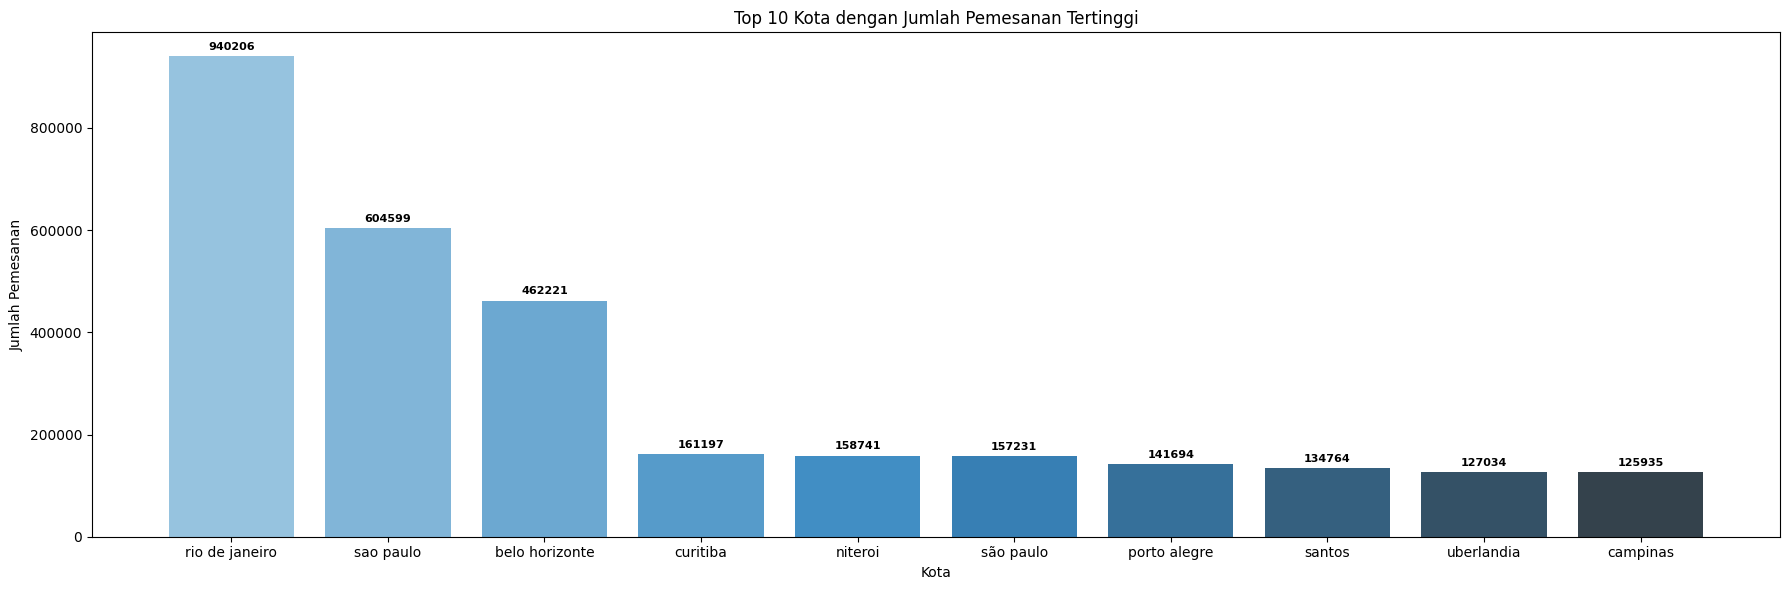

In [ ]:
# Hitung frekuensi pemesanan setiap kota
city_order_counts = merged_orders_cust_geoloc['geolocation_city'].value_counts()

# Membuat palet warna dengan variasi hue dari 'royalblue'
colors = sns.color_palette("Blues_d", len(city_order_counts.head(10)))

# Visualisasi data
plt.figure(figsize=(18, 6))
bars = plt.bar(city_order_counts.head(10).index, city_order_counts.head(10), color=colors)
plt.title('Top 10 Kota dengan Jumlah Pemesanan Tertinggi')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pemesanan')

# Menambahkan label angka di atas bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=8, color='black', weight='bold')

# Menampilkan plot
plt.tight_layout()
plt.show()


Hasil analisis menunjukkan bahwa kota yang paling sering melakukan pemesanan produk adalah Rio de Janeiro dengan total sebanyak 940,206 jumlah pemesanan. Data ini berasal dari Top 10 Kota dengan Jumlah Pemesanan Tertinggi.

### Pertanyaan 2:
Berapa presentase **produk** yang menerima **ulasan positif**?


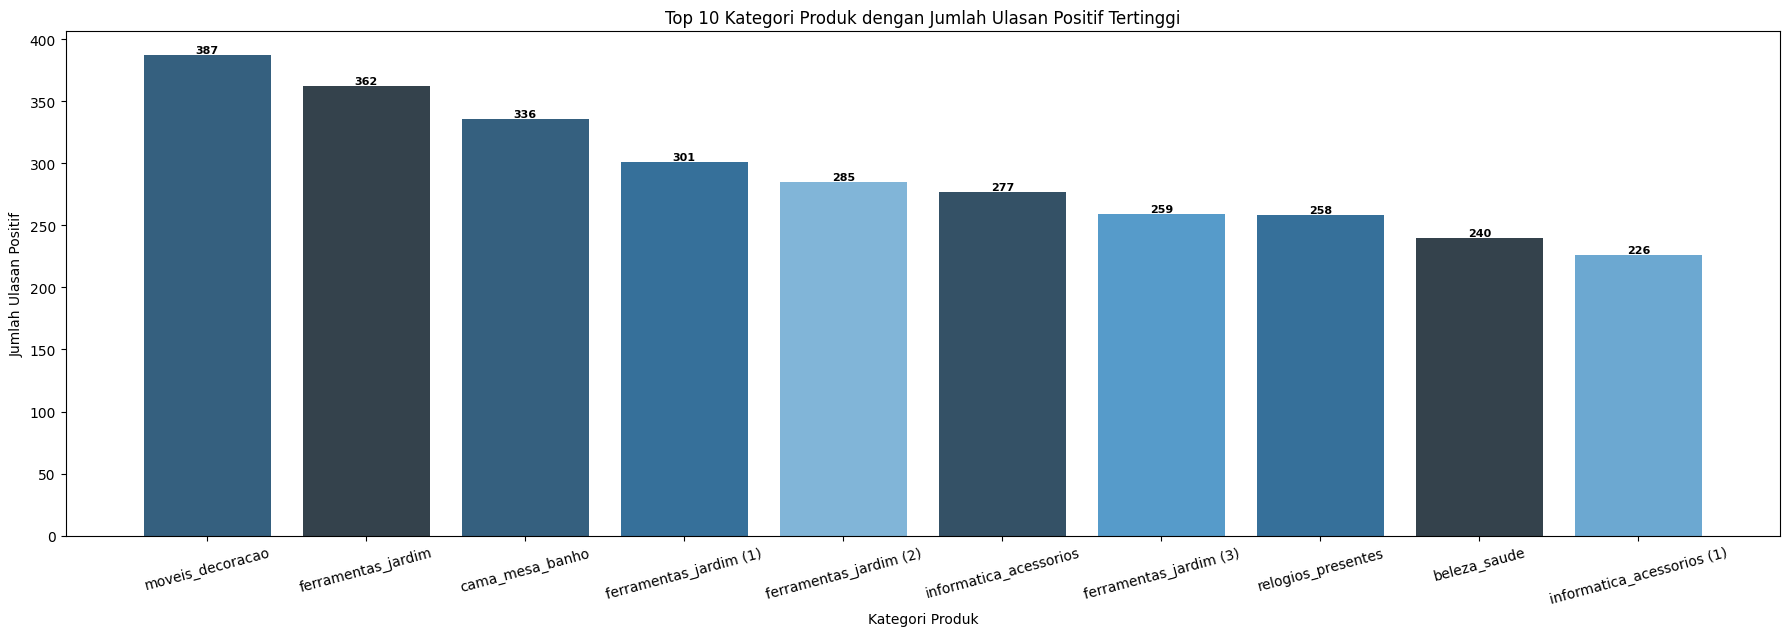

In [ ]:
# Ambil 10 produk dengan jumlah ulasan positif tertinggi
top_10_products = top_products_by_reviews.head(10)

# Membuat palet warna dengan variasi hue dari 'Blues_d'
n_colors = len(top_10_products)
colors = sns.color_palette("Blues_d", n_colors)

# Visualisasi data
plt.figure(figsize=(18, 6))

# Membuat penampung untuk nama yang sudah digunakan
used_names = set()

for index, row in top_10_products.iterrows():
    product_name = row['product_category_name']

    # Jika nama produk sudah digunakan, tambahkan perbedaan vertikal
    i = 1
    while product_name in used_names:
        product_name = f"{row['product_category_name']} ({i})"
        i += 1

    # Tambahkan nama produk ke set nama yang sudah digunakan
    used_names.add(product_name)

    # Buat bar dengan nama produk yang sudah disesuaikan
    plt.bar(product_name, row['review_id'], color=colors[index % n_colors])

# Menambahkan label angka di atas bar
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=8, color='black', weight='bold')

plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Ulasan Positif')
plt.title('Top 10 Kategori Produk dengan Jumlah Ulasan Positif Tertinggi')

# Tampilkan plot
plt.tight_layout()
plt.xticks(rotation=15)
plt.show()

- Berdasarkan analisis data, ditemukan bahwa persentase produk yang menerima ulasan positif sebesar 75.56%. Untuk menghitung ulasan positif, digunakan nilai ulasan yang lebih dari 4.
- Selain itu, kategori produk dengan jumlah ulasan positif tertinggi adalah "Moveis Decoracao" dengan total 387 ulasan positif.

### Pertanyaan 3:
**Produk** apa saja yang memiliki jumlah penjualan **tertinggi** dan **terendah**?

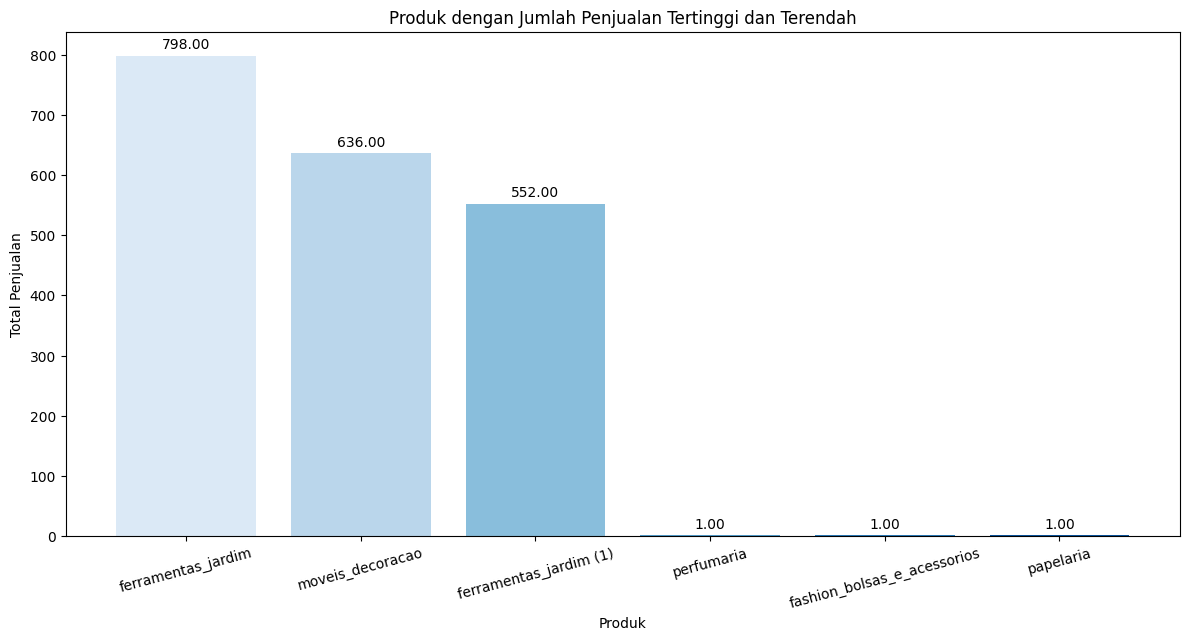

In [ ]:
# Mengambil data 3 produk dengan jumlah penjualan tertinggi
top_selling_products = product_sales_counts.sort_values(by='order_item_id', ascending=False).head(3)

# Mengambil data 3 produk dengan jumlah penjualan terendah
bottom_selling_product = product_sales_counts.sort_values(by='order_item_id', ascending=True).head(3)

# Membuat daftar produk dan total penjualannya untuk 3 tertinggi
top_products = list(top_selling_products['product_category_name'])
top_sales = list(top_selling_products['order_item_id'])

# Membuat daftar produk dan total penjualannya untuk 3 terendah
bottom_product = list(bottom_selling_product['product_category_name'])
bottom_sale = list(bottom_selling_product['order_item_id'])

# Membuat layout subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Membuat palet warna dengan variasi hue dari 'Blues'
n_colors = len(top_products) + len(bottom_product)
colors = sns.color_palette("Blues", n_colors)

# Membuat penampung untuk nama yang sudah digunakan
used_names = set()

# Diagram batang untuk 3 produk dengan penjualan tertinggi
for index, (product_name, sales) in enumerate(zip(top_products, top_sales)):
    # Jika nama produk sudah digunakan, tambahkan perbedaan vertikal
    i = 1
    while product_name in used_names:
        product_name = f"{top_products[index]} ({i})"
        i += 1

    # Tambahkan nama produk ke set nama yang sudah digunakan
    used_names.add(product_name)

    # Buat bar dengan nama produk yang sudah disesuaikan
    plt.bar(product_name, sales, color=colors[index])

# Diagram batang untuk 3 produk dengan penjualan terendah
for index, (product_name, sales) in enumerate(zip(bottom_product, bottom_sale)):
    # Jika nama produk sudah digunakan, tambahkan perbedaan vertikal
    i = 0
    while product_name in used_names:
        product_name = f"{bottom_product[index]} ({i})"
        i += 1

    # Tambahkan nama produk ke set nama yang sudah digunakan
    used_names.add(product_name)

    # Buat bar dengan nama produk yang sudah disesuaikan
    plt.bar(product_name, sales, color=colors[len(top_products) + index])

# Menambahkan label dan judul
ax.set_xlabel('Produk')
ax.set_ylabel('Total Penjualan')
ax.set_title('Produk dengan Jumlah Penjualan Tertinggi dan Terendah')

# Menambahkan angka di atas bar
for bar in ax.containers:
    height = bar[0].get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar[0].get_x() + bar[0].get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Menampilkan visualisasi
plt.tight_layout()
plt.xticks(rotation=15)
plt.show()

Berdasarkan analisis data, ditemukan bahwa:

- Produk dengan jumlah penjualan tertinggi adalah "Ferramentas Jardim" dengan total penjualan sebanyak 798 unit.
- Di sisi lain, produk dengan jumlah penjualan terendah adalah "Perfumaria" dengan hanya 1 unit terjual.

### Pertanyaan 4:
Berapa **total pendapatan penjualan** perusahaan?

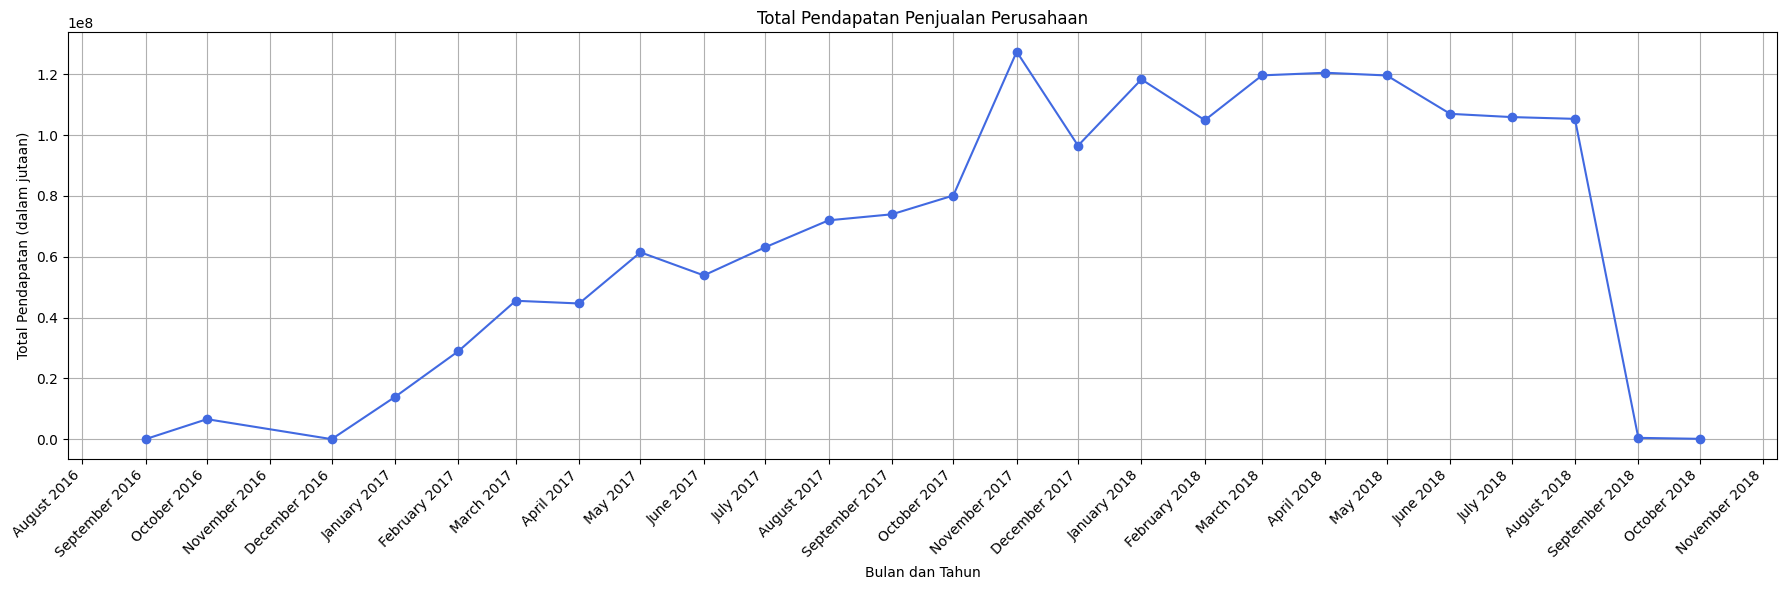

In [ ]:
# Mengelompokkan data ke dalam bulan
monthly_revenue = merged_orders_cust_geoloc_payment.groupby(merged_orders_cust_geoloc_payment['order_purchase_timestamp'].dt.to_period("M"))['payment_value'].sum()

# Membuat time series plot dengan interval bulanan
plt.figure(figsize=(18, 6))
plt.plot(monthly_revenue.index.start_time, monthly_revenue.values, marker='o', color='royalblue')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Total Pendapatan (dalam jutaan)')
plt.title('Total Pendapatan Penjualan Perusahaan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Berdasarkan analisis data, total pendapatan penjualan perusahaan selama periode waktu dari 4 September 2016 hingga 17 Oktober 2018 adalah sebesar 1.669.800.762.
- Sedangkan kenaikan bulanan total pendapatan tertinggi adalah bulan November 2017.

### Pertanyaan 5:
Berapa **harga produk** tertinggi dan terendah?

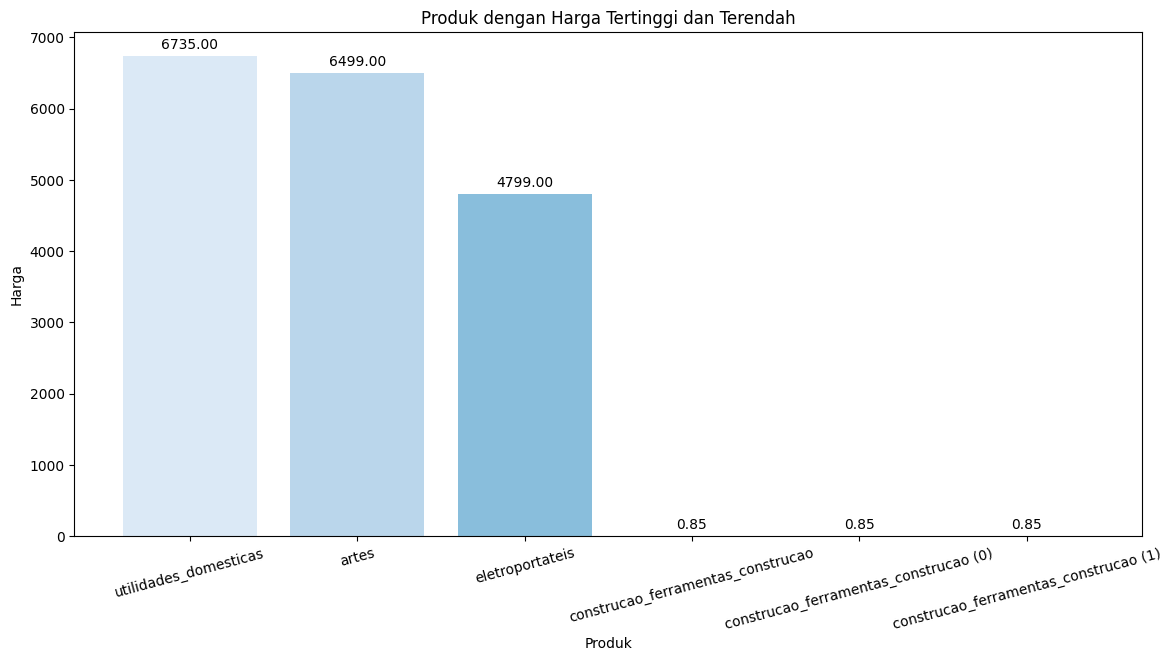

In [ ]:
# Mengambil data 3 produk dengan harga tertinggi
top_priced_products = merged_product_order_items_reviews.sort_values(by='price', ascending=False).head(3)

# Mengambil data 3 produk dengan harga terendah
bottom_priced_products = merged_product_order_items_reviews.sort_values(by='price', ascending=True).head(3)

# Membuat daftar produk dan harganya untuk 3 tertinggi
top_products = list(top_priced_products['product_category_name'])
top_prices = list(top_priced_products['price'])

# Membuat daftar produk dan harganya untuk 3 terendah
bottom_products = list(bottom_priced_products['product_category_name'])
bottom_prices = list(bottom_priced_products['price'])

# Membuat layout subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Membuat palet warna dengan variasi hue dari 'Blues'
n_colors = len(top_products) + len(bottom_products)
colors = sns.color_palette("Blues", n_colors)

# Membuat penampung untuk nama yang sudah digunakan
used_names = set()

# Diagram batang untuk 3 produk dengan harga tertinggi
for index, (product_name, price) in enumerate(zip(top_products, top_prices)):
    # Jika nama produk sudah digunakan, tambahkan perbedaan vertikal
    i = 1
    while product_name in used_names:
        product_name = f"{top_products[index]} ({i})"
        i += 1

    # Tambahkan nama produk ke set nama yang sudah digunakan
    used_names.add(product_name)

    # Buat bar dengan nama produk yang sudah disesuaikan
    plt.bar(product_name, price, color=colors[index])

# Diagram batang untuk 3 produk dengan harga terendah
for index, (product_name, price) in enumerate(zip(bottom_products, bottom_prices)):
    # Jika nama produk sudah digunakan, tambahkan perbedaan vertikal
    i = 0
    while product_name in used_names:
        product_name = f"{bottom_products[index]} ({i})"
        i += 1

    # Tambahkan nama produk ke set nama yang sudah digunakan
    used_names.add(product_name)

    # Buat bar dengan nama produk yang sudah disesuaikan
    plt.bar(product_name, price, color=colors[len(top_products) + index])

# Menambahkan label dan judul
ax.set_xlabel('Produk')
ax.set_ylabel('Harga')
ax.set_title('Produk dengan Harga Tertinggi dan Terendah')

# Menambahkan angka di atas bar
for bar in ax.containers:
    height = bar[0].get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar[0].get_x() + bar[0].get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Menampilkan visualisasi
plt.tight_layout()
plt.xticks(rotation=15)
plt.show()


Berdasarkan analisis data, harga produk tertinggi adalah untuk kategori "utilidades_domesticas" dengan harga sebesar 6735.0, sementara harga produk terendah adalah untuk kategori "agro_industria_e_comercio" dengan harga sebesar 0.85.

## Conclusion

- **Conclution pertanyaan 1**

  Kota yang paling sering melakukan pemesanan produk adalah Rio de Janeiro. Hal ini didasarkan pada analisis data frekuensi pemesanan produk yang mengungkapkan bahwa Rio de Janeiro memiliki jumlah pemesanan produk tertinggi dibandingkan dengan kota-kota lainnya dalam dataset yang tersedia.

- **Conclution pertanyaan 2**

  Berdasarkan data yang disediakan, beberapa kategori produk yang memiliki presentase positif yang tinggi adalah:

  1. Kategori "moveis_decoracao" dengan presentase positif sebesar 0.46%.

  2. Kategori "ferramentas_jardim" dengan presentase positif sebesar 0.43%.

  3. Kategori "cama_mesa_banho" dengan presentase positif sebesar 0.40%.

  Kategori-kategori ini memiliki presentase produk yang menerima ulasan positif di atas rata-rata, sehingga dapat dianggap sebagai produk-produk yang mendapat respon positif dari pelanggan. Ini bisa menjadi informasi berharga bagi penjual atau produsen untuk lebih fokus pada produk-produk dalam kategori ini atau mengambil tindakan untuk meningkatkan ulasan positif pada kategori lainnya.

- **Conclution pertanyaan 3**

  1. Produk dengan jumlah penjualan tertinggi:

    Kategori produk "ferramentas_jardim" adalah yang memiliki jumlah penjualan tertinggi dengan total penjualan sebanyak 798 item. Kategori ini sangat diminati oleh pelanggan, dan penjual mungkin ingin mempertimbangkan untuk meningkatkan stok atau promosi produk ini.
  
  2. Produk dengan jumlah penjualan terendah:

    Kategori produk "perfumaria" adalah yang memiliki jumlah penjualan terendah dengan hanya 1 item terjual. Kategori ini memiliki tingkat permintaan yang lebih rendah dibandingkan dengan kategori lainnya. Penjual mungkin perlu melakukan strategi promosi atau peningkatan lainnya untuk meningkatkan penjualan produk ini.

- **Conclution pertanyaan 4**

  Total pendapatan penjualan perusahaan adalah sebesar 1.669.800.762. Ini merupakan jumlah pendapatan yang dihasilkan dari penjualan berbagai produk selama periode waktu yang diamati. Total pendapatan ini merupakan gambaran dari kinerja penjualan perusahaan dalam periode tersebut.


- **Conclution pertanyaan 5**

  1. Harga produk tertinggi dalam dataset ini adalah 6.735,00 unit mata uang (tidak ada satuan yang spesifik dalam data yang diberikan) dan produk ini termasuk dalam kategori "utilidades_domesticas."

  2. Harga produk terendah dalam dataset ini adalah 0,85 unit mata uang dan produk ini termasuk dalam kategori "agro_industria_e_comercio."
